In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv('../datasets/megaline_calls.csv')
df_internet = pd.read_csv('../datasets/megaline_internet.csv')
df_messages = pd.read_csv('../datasets/megaline_messages.csv')
df_plans = pd.read_csv('../datasets/megaline_plans.csv')
df_users = pd.read_csv('../datasets/megaline_users.csv')

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info(show_counts=True)
df_plans.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
cols = df_plans.columns.tolist()
cols = ['plan_name'] + [col for col in cols if col != 'plan_name']
df_plans = df_plans[cols]
df_plans.head()

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


In [6]:
df_plans['plan_name'] = df_plans['plan_name'].str.capitalize()

#df_plans['usd_monthly_pay'] = '$' + df_plans['usd_monthly_pay'].astype(str)
#df_plans['usd_per_minute'] = '$' + df_plans['usd_per_minute'].astype(str)
#df_plans['usd_per_message'] = '$' + df_plans['usd_per_message'].astype(str)

df_plans.head()

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Surf,50,15360,500,20,10,0.03,0.03
1,Ultimate,1000,30720,3000,70,7,0.01,0.01


In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info(show_counts=True)
df_users.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

In [8]:
# Imprime una muestra de datos para usuarios
df_users.sample(10)
#df_users['churn_date'].unique()
#filas_duplicadas = df_users[df_users.duplicated(keep=False)]
#print(filas_duplicadas)
#df_users[df_users.duplicated(subset=['last_name'], keep=False)]
#df_users['age'].max()
#df_users['age'].min()
#df_users[df_users.isnull().any(axis=1)]
#df_users[df_users.duplicated(subset=['user_id'], keep=False)]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
137,1137,Allegra,Hopkins,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-10-02,surf,NaN
69,1069,Dino,Fry,31,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-17,ultimate,NaN
380,1380,Lajuana,Kelley,35,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-09-04,ultimate,NaN
107,1107,Lane,Cash,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-15,ultimate,NaN
471,1471,Britni,Mitchell,59,"Richmond, VA MSA",2018-10-13,surf,NaN
25,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaN
205,1205,Rafael,Wade,43,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-05,surf,NaN
352,1352,Gavin,Galloway,48,"Seattle-Tacoma-Bellevue, WA MSA",2018-09-08,ultimate,NaN
60,1060,Denisse,Santos,53,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-04-07,surf,NaN
341,1341,Kaila,Andrews,28,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-17,surf,NaN


In [9]:
#df_users['churn_date']
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [10]:
df_users['plan'] = df_users['plan'].str.capitalize()
df_users['churn_date'] = df_users['churn_date'].fillna('Usuario activo')
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,Surf,2018-11-11
231,1231,Gaylord,Witt,57,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-01-19,Ultimate,Usuario activo
252,1252,Mitsue,York,27,"Detroit-Warren-Dearborn, MI MSA",2018-06-10,Surf,Usuario activo
307,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,Surf,Usuario activo
288,1288,Jenette,Rush,60,"Las Vegas-Henderson-Paradise, NV MSA",2018-07-18,Surf,Usuario activo
417,1417,Jorge,Madden,51,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-06-22,Ultimate,Usuario activo
415,1415,Rosette,Mendez,56,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-27,Surf,Usuario activo
485,1485,Damion,Woodard,67,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-08-21,Surf,Usuario activo
188,1188,Ethelene,Brock,31,"Richmond, VA MSA",2018-01-10,Ultimate,Usuario activo
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,Surf,Usuario activo


In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info(show_counts=True)
df_calls.dtypes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


id            object
user_id        int64
call_date     object
duration     float64
dtype: object

In [12]:
# Imprime una muestra de datos para las llamadas
df_calls.sample(10)

#filas_duplicadas = df_calls[df_calls.duplicated(keep=False)]
#print(filas_duplicadas)

#df_calls[df_calls.duplicated(subset=['user_id'], keep=False)]
#df_calls[df_calls.duplicated(subset=['id'], keep=False)]

,id,user_id,call_date,duration
2401,1009_823,1009,2018-09-03,6.71
129835,1467_71,1467,2018-09-30,17.41
91344,1329_153,1329,2018-11-22,14.04
113078,1397_839,1397,2018-08-02,0.00
43655,1159_251,1159,2018-12-18,5.67
119356,1415_404,1415,2018-08-23,0.00
45854,1166_37,1166,2018-09-20,11.29
14670,1060_52,1060,2018-12-28,3.12
79194,1284_46,1284,2018-12-11,5.86
92649,1334_17,1334,2018-09-13,3.36


In [13]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_messages.info(show_counts=True)
df_messages.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


id              object
user_id          int64
message_date    object
dtype: object

In [15]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [16]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info(show_counts=True)
df_internet.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

In [17]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(10)


,id,user_id,session_date,mb_used
33656,1153_143,1153,2018-07-22,24.67
96171,1449_102,1449,2018-11-22,369.07
3417,1019_42,1019,2018-12-28,108.26
24313,1111_85,1111,2018-11-15,677.11
92438,1431_125,1431,2018-11-16,654.62
86000,1400_131,1400,2018-07-08,478.29
96793,1456_21,1456,2018-09-03,230.78
70833,1331_84,1331,2018-08-13,337.44
67000,1312_223,1312,2018-09-13,301.95
75083,1353_246,1353,2018-09-05,240.23


In [18]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [19]:
#Convierte el uso de internet de megabytes a gigabytes
df_internet['mb_used'] = df_internet['mb_used'] / 1024

In [20]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

df_plans.info(show_counts=True)
df_plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   plan_name              2 non-null      object 
 1   messages_included      2 non-null      int64  
 2   mb_per_month_included  2 non-null      int64  
 3   minutes_included       2 non-null      int64  
 4   usd_monthly_pay        2 non-null      int64  
 5   usd_per_gb             2 non-null      int64  
 6   usd_per_message        2 non-null      float64
 7   usd_per_minute         2 non-null      float64
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Surf,50,15360,500,20,10,0.03,0.03
1,Ultimate,1000,30720,3000,70,7,0.01,0.01


In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

df_calls['year_month'] = df_calls['call_date'].dt.to_period('M')
calls_mon = df_calls.groupby(['user_id', 'year_month']).size().reset_index(name='calls_count')
calls_mon.head(20)
print(calls_mon[calls_mon['user_id'] == 1054])


     user_id year_month  calls_count
223     1054    2018-04            6
224     1054    2018-05           37
225     1054    2018-06           32
226     1054    2018-07           44
227     1054    2018-08           28
228     1054    2018-09           41
229     1054    2018-10           37
230     1054    2018-11           27
231     1054    2018-12           60


In [ ]:

# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_calls['duration'] = np.ceil(df_calls['duration'])
minutes_mon = df_calls.groupby(['user_id', 'year_month'])['duration'].sum().reset_index(name='minutes_used')
print(minutes_mon[minutes_mon['user_id'] == 1100])


     user_id year_month  minutes_used
466     1100    2018-08         230.0
467     1100    2018-09         497.0
468     1100    2018-10         252.0
469     1100    2018-11         366.0
470     1100    2018-12         306.0


In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

df_messages['year_month'] = df_messages['message_date'].dt.to_period('M')
messages_mon = df_messages.groupby(['user_id', 'year_month'])['id'].size().reset_index(name='messages_count')
print(messages_mon[messages_mon['user_id'] == 1045])

     user_id year_month  messages_count
127     1045    2018-10              34
128     1045    2018-11              49
129     1045    2018-12              47


In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

df_internet['year_month'] = df_internet['session_date'].dt.to_period('M')
internet_mon = df_internet.groupby(['user_id', 'year_month'])['mb_used'].sum().reset_index(name='vol_count')
print(internet_mon[internet_mon['user_id'] == 1002])

   user_id year_month  vol_count
6     1002    2018-10   6.398447
7     1002    2018-11  18.891680
8     1002    2018-12  14.058828


In [25]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

df_fusion_1 = calls_mon.merge(minutes_mon, on=['user_id', 'year_month'], how='outer')
df_fusion_2 = df_fusion_1.merge(messages_mon, on=['user_id', 'year_month'], how='outer')
df_fusion_3 = df_fusion_2.merge(internet_mon, on=['user_id', 'year_month'], how='outer')
df_fusion_3.fillna(0, inplace=True)
#df_fusion_3.head(10)
#df_fusion_3[df_fusion_3.isnull().any(axis=1)]
                                
print(df_fusion_3[df_fusion_3['user_id'] == 1010])

    user_id year_month  calls_count  minutes_used  messages_count  vol_count
37     1010    2018-03         63.0         429.0             0.0  10.439473
38     1010    2018-04         90.0         656.0             0.0  19.260098
39     1010    2018-05         81.0         532.0             0.0  15.516133
40     1010    2018-06         77.0         553.0             0.0  16.434873
41     1010    2018-07        101.0         698.0             0.0  12.366318
42     1010    2018-08         93.0         637.0             0.0  19.347500
43     1010    2018-09         83.0         601.0             0.0  16.419658
44     1010    2018-10         95.0         711.0             0.0  16.540801
45     1010    2018-11         30.0         258.0             0.0   7.798428


In [26]:
# Añade la información de la tarifa
df_final_fusion = df_fusion_3.merge(df_users, on='user_id', how='inner') 

print(df_final_fusion[df_final_fusion['user_id'] == 1010])

    user_id year_month  calls_count  minutes_used  messages_count  vol_count  \
37     1010    2018-03         63.0         429.0             0.0  10.439473   
38     1010    2018-04         90.0         656.0             0.0  19.260098   
39     1010    2018-05         81.0         532.0             0.0  15.516133   
40     1010    2018-06         77.0         553.0             0.0  16.434873   
41     1010    2018-07        101.0         698.0             0.0  12.366318   
42     1010    2018-08         93.0         637.0             0.0  19.347500   
43     1010    2018-09         83.0         601.0             0.0  16.419658   
44     1010    2018-10         95.0         711.0             0.0  16.540801   
45     1010    2018-11         30.0         258.0             0.0   7.798428   

   first_name last_name  age                                 city   reg_date  \
37     Wilber     Blair   52  Dallas-Fort Worth-Arlington, TX MSA 2018-03-09   
38     Wilber     Blair   52  Dallas-Fo

In [27]:
#Calcula el ingreso mensual para cada usuario
#(df_fusion_3[df_fusion_3['user_id'] == 1010])


Surf_lmb = df_plans[df_plans['plan_name'] == 'Surf']['mb_per_month_included'].iloc[0]
Ultimate_lmb = df_plans[df_plans['plan_name'] == 'Ultimate']['mb_per_month_included'].iloc[0]

Surf_bill = df_plans[df_plans['plan_name'] == 'Surf']['usd_monthly_pay'].iloc[0]
Ultimate_bill = df_plans[df_plans['plan_name'] == 'Ultimate']['usd_monthly_pay'].iloc[0]

Surf_lmin = df_plans[df_plans['plan_name'] == 'Surf']['minutes_included'].iloc[0]
Ultimate_lmin = df_plans[df_plans['plan_name'] == 'Ultimate']['minutes_included'].iloc[0]

Surf_lmes = df_plans[df_plans['plan_name'] == 'Surf']['messages_included'].iloc[0]
Ultimate_lmes = df_plans[df_plans['plan_name'] == 'Ultimate']['messages_included'].iloc[0]

Surf_tgb = df_plans[df_plans['plan_name'] == 'Surf']['usd_per_gb'].iloc[0]
Ultimate_tgb = df_plans[df_plans['plan_name'] == 'Ultimate']['usd_per_gb'].iloc[0]

Surf_tmes = df_plans[df_plans['plan_name'] == 'Surf']['usd_per_message'].iloc[0]
Ultimate_tmes = df_plans[df_plans['plan_name'] == 'Ultimate']['usd_per_message'].iloc[0]

Surf_tmin = df_plans[df_plans['plan_name'] == 'Surf']['usd_per_minute'].iloc[0]
Ultimate_tmin = df_plans[df_plans['plan_name'] == 'Ultimate']['usd_per_minute'].iloc[0]








print(Surf_bill)
print(Ultimate_bill)
print()
print(Surf_lmb)
print(Ultimate_lmb)
print()
print(Surf_lmin)
print(Ultimate_lmin)
print()
print(Surf_lmes)
print(Ultimate_lmes)
print()
print(Surf_tgb)
print(Ultimate_tgb)
print()
print(Surf_tmes)
print(Ultimate_tmes)
print()
print(Surf_tmin)
print(Ultimate_tmin)
#ltimate_plan


df_final_fusion['monthly_revenue'] = np.where(
    df_final_fusion['plan'] == 'Surf', 
    Surf_bill, 
    Ultimate_bill
)


df_final_fusion['monthly_revenue'] += np.where(
    (df_final_fusion['plan'] == 'Surf') & (df_final_fusion['minutes_used'] > Surf_lmin),
    (df_final_fusion['minutes_used'] - Surf_lmin) * Surf_tmin,
    0
) + np.where(
    (df_final_fusion['plan'] == 'Ultimate') & (df_final_fusion['minutes_used'] > Ultimate_lmin),
    (df_final_fusion['minutes_used'] - Ultimate_lmin) * Ultimate_tmin,
    0
)


df_final_fusion['monthly_revenue'] += np.where(
    (df_final_fusion['plan'] == 'Surf') & (df_final_fusion['messages_count'] > Surf_lmes),
    (df_final_fusion['messages_count'] - Surf_lmes) * Surf_tmes,
    0
) + np.where(
    (df_final_fusion['plan'] == 'Ultimate') & (df_final_fusion['messages_count'] > Ultimate_lmes),
    (df_final_fusion['messages_count'] - Ultimate_lmes) * Ultimate_tmes,
    0
)


df_final_fusion['monthly_revenue'] += np.where(
    (df_final_fusion['plan'] == 'Surf') & (df_final_fusion['vol_count'] > Surf_lmb/1024),
    np.ceil(df_final_fusion['vol_count'] - Surf_lmb/1024) * Surf_tgb,
    0
) + np.where(
    (df_final_fusion['plan'] == 'Ultimate') & (df_final_fusion['vol_count'] > Ultimate_lmb/1024),
     np.ceil(df_final_fusion['vol_count'] - Ultimate_lmb/1024) * Ultimate_tgb,
    0
)

df_final_fusion_activos = df_final_fusion[df_final_fusion['churn_date'] == 'Usuario activo']


columnas_ordenadas = ['plan', 'user_id', 'first_name', 'last_name', 'age', 'monthly_revenue', 'city', 'calls_count', 'minutes_used', 'messages_count', 'vol_count', 'year_month', 'reg_date', 'churn_date']
df_final_fusion_activos = df_final_fusion_activos[columnas_ordenadas]

								




df_final_fusion_activos.info()
df_final_fusion_activos['vol_count'] = np.ceil(df_final_fusion_activos['vol_count'])

df_final_fusion_activos_Surf = df_final_fusion_activos[df_final_fusion_activos['plan'] == 'Surf']
df_final_fusion_activos_Ultimate = df_final_fusion_activos[df_final_fusion_activos['plan'] == 'Ultimate']
print(df_final_fusion_activos.head(5))

20
70

15360
30720

500
3000

50
1000

10
7

0.03
0.01

0.03
0.01
<class 'pandas.core.frame.DataFrame'>
Index: 2135 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   plan             2135 non-null   object        
 1   user_id          2135 non-null   int64         
 2   first_name       2135 non-null   object        
 3   last_name        2135 non-null   object        
 4   age              2135 non-null   int64         
 5   monthly_revenue  2135 non-null   float64       
 6   city             2135 non-null   object        
 7   calls_count      2135 non-null   float64       
 8   minutes_used     2135 non-null   float64       
 9   messages_count   2135 non-null   float64       
 10  vol_count        2135 non-null   float64       
 11  year_month       2135 non-null   period[M]     
 12  reg_date         2135 non-null   datetime64[ns]
 13  churn_date       2135 non-null  

    plan year_month  avg_call_duration
0   Surf    2018-01           6.642857
1   Surf    2018-02           6.814628
2   Surf    2018-03           7.199957
3   Surf    2018-04           7.040349
4   Surf    2018-05           6.996065
5   Surf    2018-06           7.141114
6   Surf    2018-07           6.969665
7   Surf    2018-08           6.995927
8   Surf    2018-09           7.017420
9   Surf    2018-10           6.953572
10  Surf    2018-11           7.083883
11  Surf    2018-12           7.059456


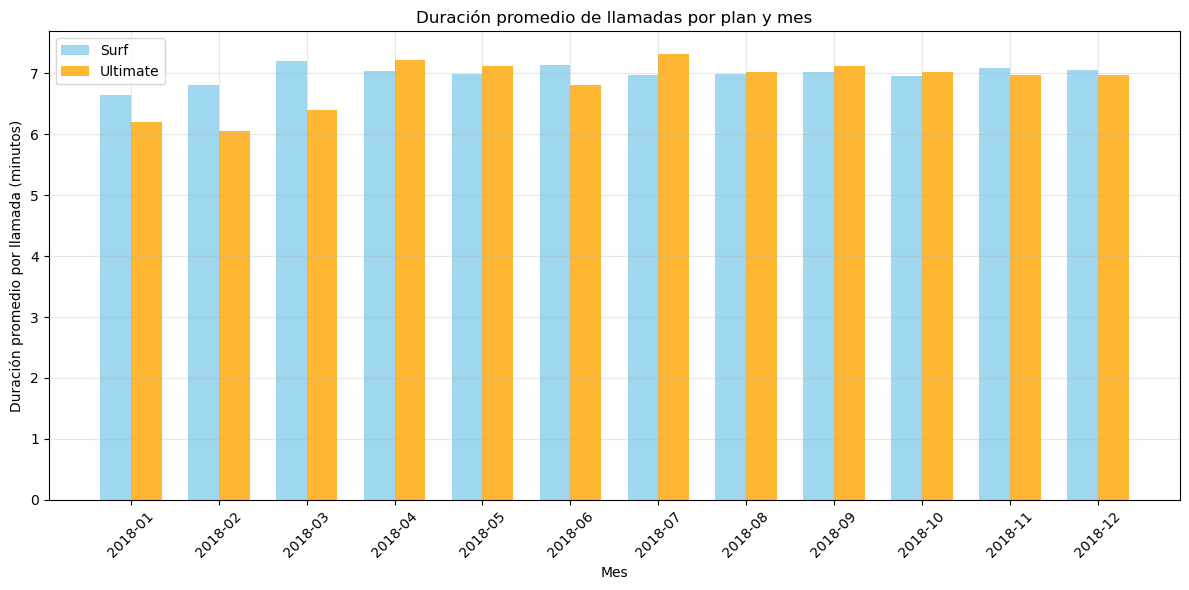

In [28]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_final_fusion['avg_call_duration'] = df_final_fusion['minutes_used'] / df_final_fusion['calls_count']


df_final_fusion['avg_call_duration'] = df_final_fusion['avg_call_duration'].replace([np.inf, -np.inf], 0)
df_final_fusion['avg_call_duration'] = df_final_fusion['avg_call_duration'].fillna(0)


avg_duration_by_plan_month = df_final_fusion.groupby(['plan', 'year_month'])['avg_call_duration'].mean().reset_index()
print(avg_duration_by_plan_month.head(12))

surf_data = avg_duration_by_plan_month[avg_duration_by_plan_month['plan'] == 'Surf']
ultimate_data = avg_duration_by_plan_month[avg_duration_by_plan_month['plan'] == 'Ultimate']


fig, ax = plt.subplots(figsize=(12, 6))


months = surf_data['year_month'].astype(str)
x = range(len(months))
width = 0.35


ax.bar([i - width/2 for i in x], surf_data['avg_call_duration'], width, label='Surf', alpha=0.8, color='skyblue')
ax.bar([i + width/2 for i in x], ultimate_data['avg_call_duration'], width, label='Ultimate', alpha=0.8, color='orange')


ax.set_xlabel('Mes')
ax.set_ylabel('Duración promedio por llamada (minutos)')
ax.set_title('Duración promedio de llamadas por plan y mes')
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



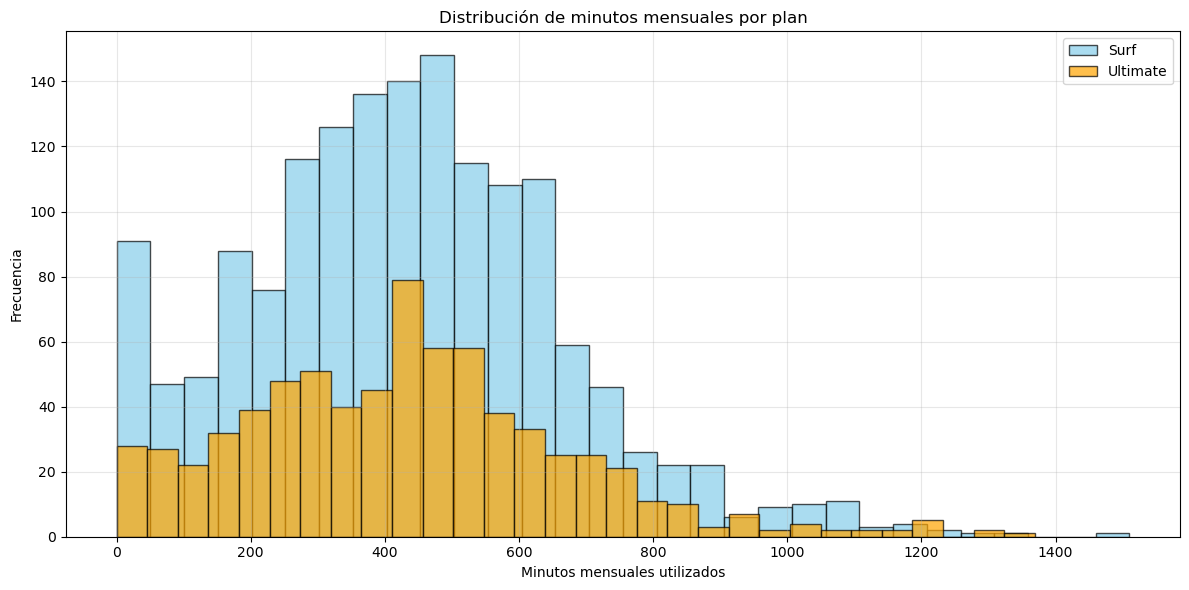

Estadísticas de minutos mensuales:

Plan Surf:
Media: 428.75 minutos
Mediana: 425.00 minutos
Desviación estándar: 234.45 minutos

Plan Ultimate:
Media: 430.45 minutos
Mediana: 424.00 minutos
Desviación estándar: 240.51 minutos


In [29]:

# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

surf_minutes = df_final_fusion[df_final_fusion['plan'] == 'Surf']['minutes_used']
ultimate_minutes = df_final_fusion[df_final_fusion['plan'] == 'Ultimate']['minutes_used']


fig, ax = plt.subplots(figsize=(12, 6))


ax.hist(surf_minutes, bins=30, alpha=0.7, label='Surf', color='skyblue', edgecolor='black')
ax.hist(ultimate_minutes, bins=30, alpha=0.7, label='Ultimate', color='orange', edgecolor='black')


ax.set_xlabel('Minutos mensuales utilizados')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de minutos mensuales por plan')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



print("Estadísticas de minutos mensuales:")
print("\nPlan Surf:")
print(f"Media: {surf_minutes.mean():.2f} minutos")
print(f"Mediana: {surf_minutes.median():.2f} minutos")
print(f"Desviación estándar: {surf_minutes.std():.2f} minutos")

print("\nPlan Ultimate:")
print(f"Media: {ultimate_minutes.mean():.2f} minutos")
print(f"Mediana: {ultimate_minutes.median():.2f} minutos")
print(f"Desviación estándar: {ultimate_minutes.std():.2f} minutos")





In [30]:

# Calcula la media y la varianza de la duración mensual de llamadas.
surf_mean = surf_minutes.mean()
surf_variance = surf_minutes.var()

print(f"Plan Surf:")
print(f"Media: {surf_mean:.2f} minutos")
print(f"Varianza: {surf_variance:.2f} minutos²")
print()

# Para plan Ultimate
ultimate_mean = ultimate_minutes.mean()
ultimate_variance = ultimate_minutes.var()

print(f"Plan Ultimate:")
print(f"Media: {ultimate_mean:.2f} minutos")
print(f"Varianza: {ultimate_variance:.2f} minutos²")


Plan Surf:
Media: 428.75 minutos
Varianza: 54968.28 minutos²

Plan Ultimate:
Media: 430.45 minutos
Varianza: 57844.46 minutos²


/var/folders/8v/tfl0m4vx2wd80yhpb6b7x1rm0000gn/T/ipykernel_38704/4041324740.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)


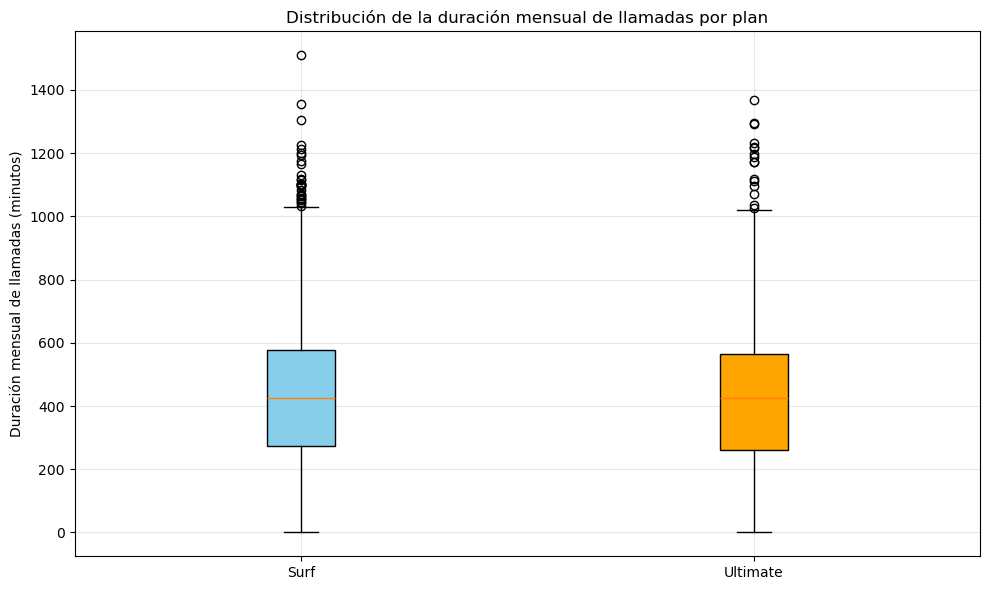

Estadísticas de distribución:

Plan Surf:
Q1 (25%): 272.00 minutos
Q2 (50% - Mediana): 425.00 minutos
Q3 (75%): 576.00 minutos

Plan Ultimate:
Q1 (25%): 260.00 minutos
Q2 (50% - Mediana): 424.00 minutos
Q3 (75%): 565.25 minutos


In [31]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
fig, ax = plt.subplots(figsize=(10, 6))

# Preparar los datos para el boxplot
data_to_plot = [surf_minutes, ultimate_minutes]
labels = ['Surf', 'Ultimate']

# Crear el diagrama de caja
box_plot = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)

# Personalizar colores
box_plot['boxes'][0].set_facecolor('skyblue')
box_plot['boxes'][1].set_facecolor('orange')

# Personalizar el gráfico
ax.set_ylabel('Duración mensual de llamadas (minutos)')
ax.set_title('Distribución de la duración mensual de llamadas por plan')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Estadísticas de distribución:")
print("\nPlan Surf:")
print(f"Q1 (25%): {surf_minutes.quantile(0.25):.2f} minutos")
print(f"Q2 (50% - Mediana): {surf_minutes.quantile(0.5):.2f} minutos")
print(f"Q3 (75%): {surf_minutes.quantile(0.75):.2f} minutos")

print("\nPlan Ultimate:")
print(f"Q1 (25%): {ultimate_minutes.quantile(0.25):.2f} minutos")
print(f"Q2 (50% - Mediana): {ultimate_minutes.quantile(0.5):.2f} minutos")
print(f"Q3 (75%): {ultimate_minutes.quantile(0.75):.2f} minutos")

In [32]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

surf_messages = df_final_fusion[df_final_fusion['plan'] == 'Surf']['messages_count']
ultimate_messages = df_final_fusion[df_final_fusion['plan'] == 'Ultimate']['messages_count']

print(f"Usuarios Surf: {len(surf_messages)} Mensajes")
print(f"Usuarios Ultimate: {len(ultimate_messages)} Mensajes")



Usuarios Surf: 1573 Mensajes
Usuarios Ultimate: 720 Mensajes


In [33]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
surf_internet = df_final_fusion_activos_Surf['vol_count']
ultimate_internet = df_final_fusion_activos_Ultimate['vol_count']

print("Estadísticas básicas de consumo de Internet:")
print(f"\nPlan Surf:")
print(f"Usuarios: {len(surf_internet)}")
print(f"Media: {surf_internet.mean():.2f} GB")
print(f"Mediana: {surf_internet.median():.2f} GB")
print(f"Desviación estándar: {surf_internet.std():.2f} GB")

print(f"\nPlan Ultimate:")
print(f"Usuarios: {len(ultimate_internet)}")
print(f"Media: {ultimate_internet.mean():.2f} GB")
print(f"Mediana: {ultimate_internet.median():.2f} GB")
print(f"Desviación estándar: {ultimate_internet.std():.2f} GB")


Estadísticas básicas de consumo de Internet:

Plan Surf:
Usuarios: 1467
Media: 16.72 GB
Mediana: 17.00 GB
Desviación estándar: 7.86 GB

Plan Ultimate:
Usuarios: 668
Media: 17.41 GB
Mediana: 17.00 GB
Desviación estándar: 7.77 GB


<Figure size 640x480 with 0 Axes>

Estadísticas de consumo de Internet:

Plan Surf:
Media: 16.72 GB
Mediana: 17.00 GB
Desviación estándar: 7.86 GB

Plan Ultimate:
Media: 17.41 GB
Mediana: 17.00 GB
Desviación estándar: 7.77 GB


/var/folders/8v/tfl0m4vx2wd80yhpb6b7x1rm0000gn/T/ipykernel_38704/526476506.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)


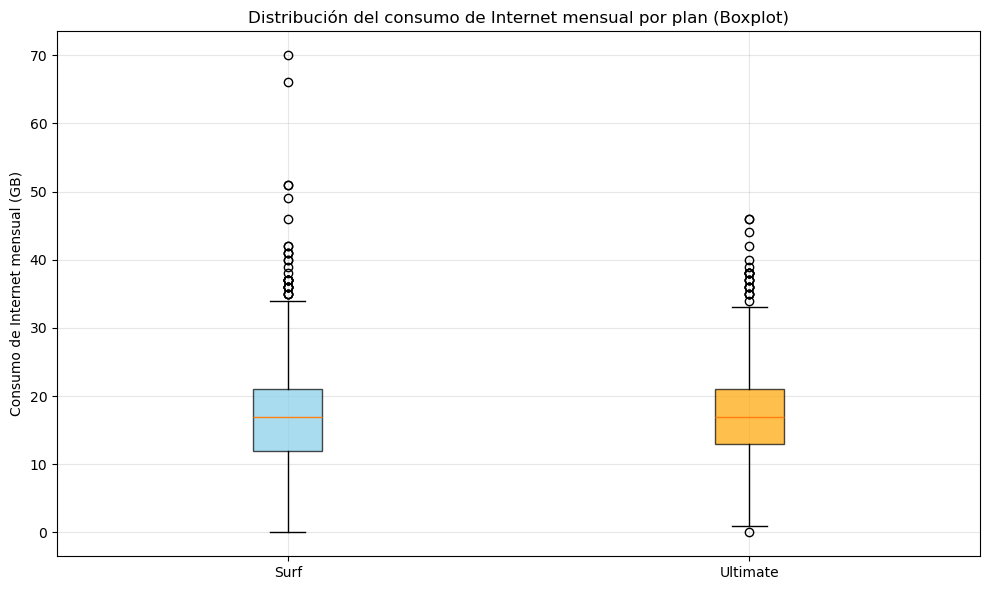

Información detallada del boxplot:

Plan Surf:
Q1 (25%): 12.00 GB
Q2 (50% - Mediana): 17.00 GB
Q3 (75%): 21.00 GB
IQR: 9.00 GB

Plan Ultimate:
Q1 (25%): 13.00 GB
Q2 (50% - Mediana): 17.00 GB
Q3 (75%): 21.00 GB
IQR: 8.00 GB


In [34]:
#no no varia se ve que el consumo no depende del plan 
#por lo que veo en ambos planes tienen un consumo parecido en internet


#esos 30g que estan dando estan de mas como la empresa ya vio que no importa si el plan cuanta mas o menos tiende al mismo consumo por ususario, seguramente de analisis anteriores vieron que el numero promedio de uso es 16 entonces crearon un plan de donde te de 15 y 30 para hacer ilusion al clielente que esta recibiendo mas o que le falta comprar mas.
#se ve que la empresa diseño el plan de 15g como limite por que ya estudiaron que 16 es el promedio y de ese 1g de diferencia de benefician de los cargos adicionales.
# Crear el histograma con ambos planes
ax.hist(surf_internet, bins=30, alpha=0.7, label='Surf', color='skyblue', edgecolor='black')
ax.hist(ultimate_internet, bins=30, alpha=0.7, label='Ultimate', color='orange', edgecolor='black')


ax.set_xlabel('Consumo de Internet mensual (GB)')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución del consumo de Internet mensual por plan')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Estadísticas de consumo de Internet:")
print(f"\nPlan Surf:")
print(f"Media: {surf_internet.mean():.2f} GB")
print(f"Mediana: {surf_internet.median():.2f} GB")
print(f"Desviación estándar: {surf_internet.std():.2f} GB")

print(f"\nPlan Ultimate:")
print(f"Media: {ultimate_internet.mean():.2f} GB")
print(f"Mediana: {ultimate_internet.median():.2f} GB")
print(f"Desviación estándar: {ultimate_internet.std():.2f} GB")

fig, ax = plt.subplots(figsize=(10, 6))

# Crear el boxplot
data_to_plot = [surf_internet, ultimate_internet]
labels = ['Surf', 'Ultimate']

box_plot = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)

# Personalizar colores
colors = ['skyblue', 'orange']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Personalizar el gráfico
ax.set_ylabel('Consumo de Internet mensual (GB)')
ax.set_title('Distribución del consumo de Internet mensual por plan (Boxplot)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("Información detallada del boxplot:")
print(f"\nPlan Surf:")
print(f"Q1 (25%): {surf_internet.quantile(0.25):.2f} GB")
print(f"Q2 (50% - Mediana): {surf_internet.quantile(0.5):.2f} GB")
print(f"Q3 (75%): {surf_internet.quantile(0.75):.2f} GB")
print(f"IQR: {surf_internet.quantile(0.75) - surf_internet.quantile(0.25):.2f} GB")
print(f"\nPlan Ultimate:")
print(f"Q1 (25%): {ultimate_internet.quantile(0.25):.2f} GB")
print(f"Q2 (50% - Mediana): {ultimate_internet.quantile(0.5):.2f} GB")
print(f"Q3 (75%): {ultimate_internet.quantile(0.75):.2f} GB")
print(f"IQR: {ultimate_internet.quantile(0.75) - ultimate_internet.quantile(0.25):.2f} GB")

In [35]:
#el plan surf da mas dinero que el ultiamte debido a las cargas por excesos de recursos por recursos del plan y numero de ususarios
#el plan ultimate genera mas por ususario que el surf

Información detallada del boxplot:

Plan Surf:
Q1 (25%): $83.96
Q2 (50% - Mediana): $200.00
Q3 (75%): $376.56
IQR: $292.60

Plan Ultimate:
Q1 (25%): $140.00
Q2 (50% - Mediana): $280.00
Q3 (75%): $490.00
IQR: $350.00
___INGRESOS MENSUALES POR PLAN ___

Plan Surf:
Media: $60.91
Varianza: $3126.73
Desviación estándar: $55.92

Plan Ultimate:
Media: $72.46
Varianza: $139.31
Desviación estándar: $11.80

___ INGRESOS TOTALES ___
Plan Surf: $89,361.02
Plan Ultimate: $48,405.00
Total empresa: $137,766.02


/var/folders/8v/tfl0m4vx2wd80yhpb6b7x1rm0000gn/T/ipykernel_38704/3535640247.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax2.boxplot(data_monthly, labels=labels_monthly, patch_artist=True)


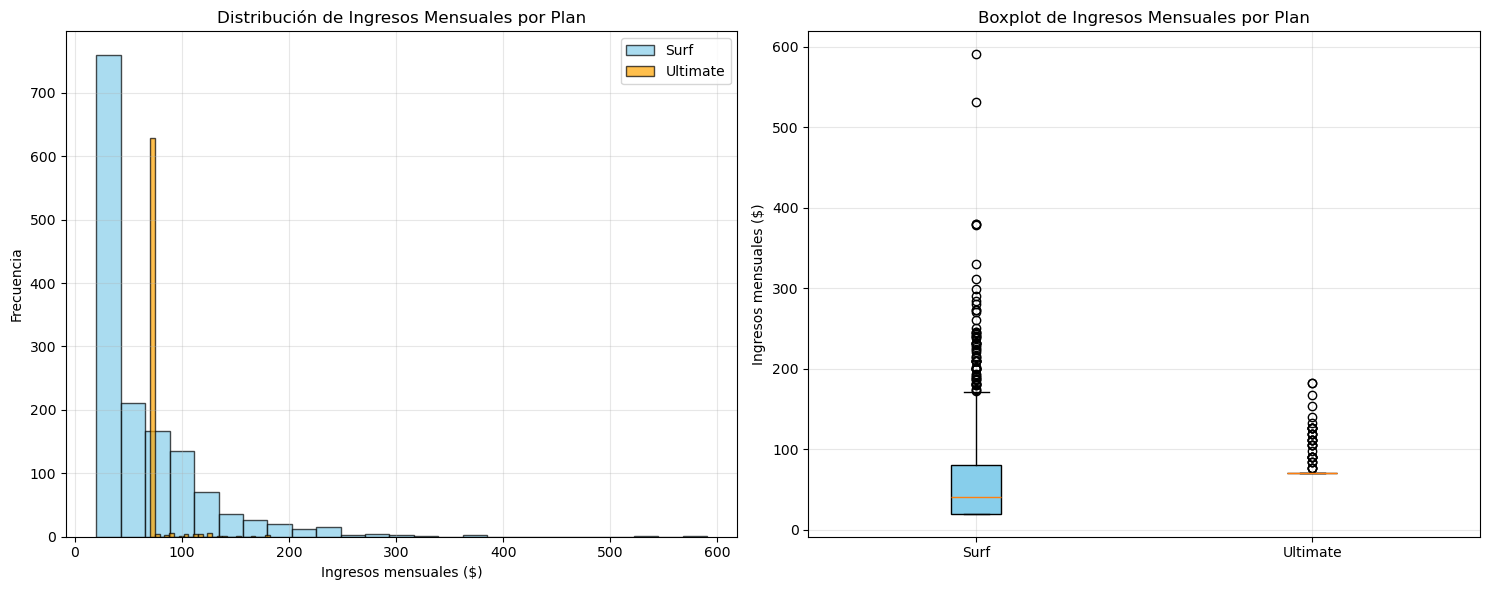

/var/folders/8v/tfl0m4vx2wd80yhpb6b7x1rm0000gn/T/ipykernel_38704/3535640247.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax2.boxplot(data_annual, labels=labels_annual, patch_artist=True)


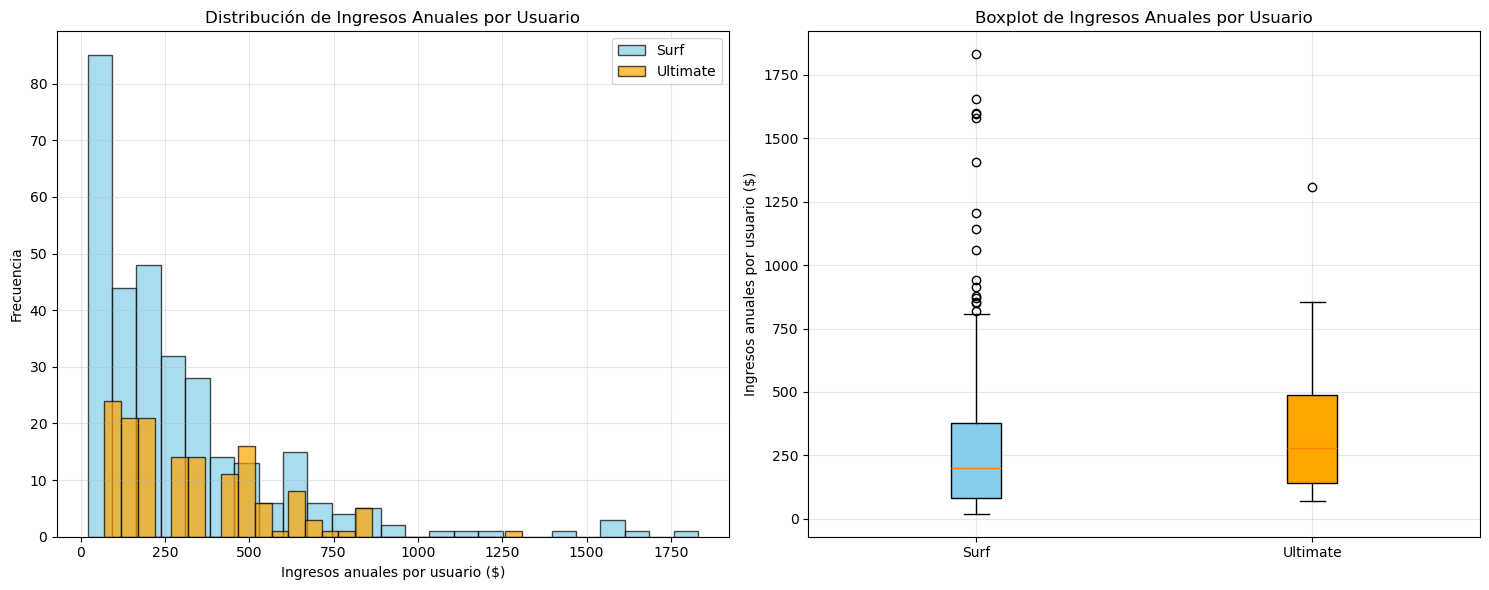


___RENTABILIDAD POR USUARIO ___
Número de usuarios Surf: 311
Número de usuarios Ultimate: 147
Ingreso promedio anual por usuario Surf: $287.33
Ingreso promedio anual por usuario Ultimate: $329.29

Diferencia: Ultimate genera $41.95 más por usuario al año


In [36]:
# hay una estrategia de ingresos diseñada por la empresa.
surf_revenue_anual = df_final_fusion_activos_Surf.groupby('user_id')['monthly_revenue'].sum()
ultimate_revenue_anual = df_final_fusion_activos_Ultimate.groupby('user_id')['monthly_revenue'].sum()

surf_revenue = df_final_fusion_activos_Surf['monthly_revenue']
ultimate_revenue = df_final_fusion_activos_Ultimate['monthly_revenue']





print("Información detallada del boxplot:")
print(f"\nPlan Surf:")
print(f"Q1 (25%): ${surf_revenue_anual.quantile(0.25):.2f}")
print(f"Q2 (50% - Mediana): ${surf_revenue_anual.quantile(0.5):.2f}")
print(f"Q3 (75%): ${surf_revenue_anual.quantile(0.75):.2f}")
print(f"IQR: ${surf_revenue_anual.quantile(0.75) - surf_revenue_anual.quantile(0.25):.2f}")

print(f"\nPlan Ultimate:")
print(f"Q1 (25%): ${ultimate_revenue_anual.quantile(0.25):.2f}")
print(f"Q2 (50% - Mediana): ${ultimate_revenue_anual.quantile(0.5):.2f}")
print(f"Q3 (75%): ${ultimate_revenue_anual.quantile(0.75):.2f}")
print(f"IQR: ${ultimate_revenue_anual.quantile(0.75) - ultimate_revenue_anual.quantile(0.25):.2f}")



print("___INGRESOS MENSUALES POR PLAN ___")
print(f"\nPlan Surf:")
print(f"Media: ${surf_revenue.mean():.2f}")
print(f"Varianza: ${surf_revenue.var():.2f}")
print(f"Desviación estándar: ${surf_revenue.std():.2f}")

print(f"\nPlan Ultimate:")
print(f"Media: ${ultimate_revenue.mean():.2f}")
print(f"Varianza: ${ultimate_revenue.var():.2f}")
print(f"Desviación estándar: ${ultimate_revenue.std():.2f}")


surf_total = surf_revenue.sum()
ultimate_total = ultimate_revenue.sum()

print(f"\n___ INGRESOS TOTALES ___")
print(f"Plan Surf: ${surf_total:,.2f}")
print(f"Plan Ultimate: ${ultimate_total:,.2f}")
print(f"Total empresa: ${surf_total + ultimate_total:,.2f}")



# Crear histograma de ingresos mensuales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histograma para ingresos mensuales
ax1.hist(surf_revenue, bins=25, alpha=0.7, label='Surf', color='skyblue', edgecolor='black')
ax1.hist(ultimate_revenue, bins=25, alpha=0.7, label='Ultimate', color='orange', edgecolor='black')
ax1.set_xlabel('Ingresos mensuales ($)')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de Ingresos Mensuales por Plan')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Boxplot para ingresos mensuales
data_monthly = [surf_revenue, ultimate_revenue]
labels_monthly = ['Surf', 'Ultimate']
box_plot = ax2.boxplot(data_monthly, labels=labels_monthly, patch_artist=True)
box_plot['boxes'][0].set_facecolor('skyblue')
box_plot['boxes'][1].set_facecolor('orange')
ax2.set_ylabel('Ingresos mensuales ($)')
ax2.set_title('Boxplot de Ingresos Mensuales por Plan')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# Crear histograma de ingresos anuales por usuario
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histograma para ingresos anuales
ax1.hist(surf_revenue_anual, bins=25, alpha=0.7, label='Surf', color='skyblue', edgecolor='black')
ax1.hist(ultimate_revenue_anual, bins=25, alpha=0.7, label='Ultimate', color='orange', edgecolor='black')
ax1.set_xlabel('Ingresos anuales por usuario ($)')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de Ingresos Anuales por Usuario')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Boxplot para ingresos anuales
data_annual = [surf_revenue_anual, ultimate_revenue_anual]
labels_annual = ['Surf', 'Ultimate']
box_plot = ax2.boxplot(data_annual, labels=labels_annual, patch_artist=True)
box_plot['boxes'][0].set_facecolor('skyblue')
box_plot['boxes'][1].set_facecolor('orange')
ax2.set_ylabel('Ingresos anuales por usuario ($)')
ax2.set_title('Boxplot de Ingresos Anuales por Usuario')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



print(f"\n___RENTABILIDAD POR USUARIO ___")
surf_users = len(surf_revenue_anual)
ultimate_users = len(ultimate_revenue_anual)

print(f"Número de usuarios Surf: {surf_users}")
print(f"Número de usuarios Ultimate: {ultimate_users}")
print(f"Ingreso promedio anual por usuario Surf: ${surf_revenue_anual.mean():.2f}")
print(f"Ingreso promedio anual por usuario Ultimate: ${ultimate_revenue_anual.mean():.2f}")

# Diferencia en rentabilidad
diferencia = ultimate_revenue_anual.mean() - surf_revenue_anual.mean()
print(f"\nDiferencia: Ultimate genera ${diferencia:.2f} más por usuario al año")

In [37]:
# Prueba las hipótesis
surf_revenue = df_final_fusion_activos_Surf['monthly_revenue']
ultimate_revenue = df_final_fusion_activos_Ultimate['monthly_revenue']

alpha = 0.05
result = st.ttest_ind(surf_revenue, ultimate_revenue)
if result.pvalue < alpha:
    print(f"CONCLUSIÓN: Rechazamos la hipótesis nula")
    print(f"Existe evidencia estadísticamente significativa de que los ingresos promedio")
    print(f"entre los planes Surf y Ultimate son diferentes (p < {alpha})")
else:
    print(f"CONCLUSIÓN: No podemos rechazar la hipótesis nula")
    print(f"No hay evidencia estadísticamente significativa de diferencia")
    print(f"en los ingresos promedio entre los planes (p ≥ {alpha})")

CONCLUSIÓN: Rechazamos la hipótesis nula
Existe evidencia estadísticamente significativa de que los ingresos promedio
entre los planes Surf y Ultimate son diferentes (p < 0.05)


In [38]:
#[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]
# Separar usuarios por región
ny_nj_users = df_final_fusion_activos[df_final_fusion_activos['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]
other_regions_users = df_final_fusion_activos[~df_final_fusion_activos['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]


ny_nj_revenue = ny_nj_users['monthly_revenue']
other_regions_revenue = other_regions_users['monthly_revenue']

alpha = 0.05
result = st.ttest_ind(ny_nj_revenue, other_regions_revenue)


if result.pvalue < alpha:
    print(f"CONCLUSIÓN: Rechazamos la hipótesis nula")
else:
    print(f"CONCLUSIÓN: No podemos rechazar la hipótesis nula")

CONCLUSIÓN: No podemos rechazar la hipótesis nula


In [45]:
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(f"Ingreso promedio Surf: ${surf_revenue.mean():.2f}")
print(f"Ingreso promedio Ultimate: ${ultimate_revenue.mean():.2f}")
print(f"Diferencia: ${ultimate_revenue.mean() - surf_revenue.mean():.2f}")


=== ESTADÍSTICAS DESCRIPTIVAS ===
Ingreso promedio Surf: $60.91
Ingreso promedio Ultimate: $72.46
Diferencia: $11.55


In [46]:

from scipy.stats import ttest_ind

# Paso 1: Verificar varianzas
stat_levene, p_levene = levene(surf_revenue, ultimate_revenue)

# Paso 2: Elegir el t-test apropiado
if p_levene > 0.05:
    # Varianzas iguales - usar t-test clásico
    stat, p_value = ttest_ind(surf_revenue, ultimate_revenue, equal_var=True)
    print("Usando t-test con varianzas iguales")
else:
    # Varianzas diferentes - usar t-test de Welch
    stat, p_value = ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)
    print("Usando t-test de Welch (varianzas diferentes)")

stat, p_value = ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print(f"T-test de Welch (varianzas diferentes):")
print(f"Estadístico t: {stat:.4f}")
print(f"P-valor: {p_value:.4f}")

if p_value < 0.05:
    print("HAY diferencia significativa entre los ingresos de ambos planes")
else:
    print("NO hay diferencia significativa entre los ingresos de ambos planes")


print("__ CONCLUSIONES PARA MEGALINE __")
print(f"Diferencia estadísticamente significativa: SÍ (p < 0.05)")
print(f"Plan más rentable por usuario: {'Ultimate' if ultimate_revenue.mean() > surf_revenue.mean() else 'Surf'}")
print(f"Diferencia promedio: ${abs(ultimate_revenue.mean() - surf_revenue.mean()):.2f} por usuario/mes")

Usando t-test de Welch (varianzas diferentes)
T-test de Welch (varianzas diferentes):
Estadístico t: -7.5496
P-valor: 0.0000
HAY diferencia significativa entre los ingresos de ambos planes
__ CONCLUSIONES PARA MEGALINE __
Diferencia estadísticamente significativa: SÍ (p < 0.05)
Plan más rentable por usuario: Ultimate
Diferencia promedio: $11.55 por usuario/mes
